# **IMPORTS**

In [ ]:
# install requirements
# pip install -r requirements

In [1]:
import cv2
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense



# **GDRIVE CONNECT**

# **IMAGE PROCESS**

In [2]:

def load_images_and_labels(data_dir,label):
    images = []
    labels = []

    # Iterate through files in the data directory
    for filename in os.listdir(data_dir):
        # Read the image
        image_path = os.path.join(data_dir, filename)
        image = cv2.imread(image_path)
        print(image_path)
        if image is not None:
            # Preprocess the image (resize, normalize, etc.)
            image = cv2.resize(image, (100, 100))
            image = image / 255.0  # Normalize pixel values
            # image = np.expand_dims(image, axis=0)
            images.append(image)
            # Add label (assuming all images are cheetah)
            labels.append(label)  # One-hot encoding for "cheetah" label
      # Convert labels to one-hot encoding
    return np.array(images), np.array(labels)

# Path to the directory containing the images
# cheetah_label = [0, 0]
# hyena_label = [1, 0]
# jaguar_label = [0, 1]
# tiger_label = [1, 1]


hyena_label= [1, 0, 0]
cheetah_label= [0, 1, 0]
jaguar_label = [1, 1, 0]
tiger_label = [0, 0, 1]



# **Data Processing**

Testing Data

In [ ]:
# Load images and labels for each class
cheetah_images, cheetah_labels = load_images_and_labels('data/cheetah_train_resized', cheetah_label)
hyena_images, hyena_labels = load_images_and_labels('data/hyena_train_resized', hyena_label)
jaguar_images, jaguar_labels = load_images_and_labels('data/jaguar_train_resized', jaguar_label)
tiger_images, tiger_labels = load_images_and_labels('data/tiger_train_resized', tiger_label)

Validation Data

In [ ]:
cheetah_images_validation, cheetah_labels_validation = load_images_and_labels('data/cheetah_validation_resized',cheetah_label)
hyena_images_validation, hyena_labels_validation = load_images_and_labels('data/hyena_validation_resized',hyena_label)
jaguar_images_validation, jaguar_labels_validation = load_images_and_labels('data/jaguar_validation_resized',jaguar_label)
tiger_images_validation, tiger_labels_validation = load_images_and_labels('data/tiger_train_resized',tiger_label)


Concatenating Testing Datas

In [5]:
training_images = np.concatenate([cheetah_images, hyena_images, jaguar_images, tiger_images], axis=0)
training_labels = np.concatenate([cheetah_labels, hyena_labels, jaguar_labels, tiger_labels], axis=0)

In [6]:
validation_images = np.concatenate([cheetah_images_validation,hyena_images_validation,jaguar_images_validation,tiger_images_validation])
validation_labels = np.concatenate([cheetah_labels_validation,hyena_labels_validation,jaguar_labels_validation,tiger_labels_validation])


Concatenating Validation Datas

In [7]:
print("Cheetah images shape:", training_images.shape)
print("Hyena images shape:", training_labels.shape)
print("Jaguar images shape:", validation_images.shape)
print("Tiger images shape:", validation_labels.shape)

Cheetah images shape: (3600, 100, 100, 3)
Hyena images shape: (3600, 3)
Jaguar images shape: (1200, 100, 100, 3)
Tiger images shape: (1200, 3)


# **Building Model**

Build model




In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
# checkpoint = ModelCheckpoint("model.h5", monitor="val_loss", verbose=1, save_best_only=True, mode="min")
early_stop = EarlyStopping(monitor="val_loss", patience=5, mode="min", verbose=1)


model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(500, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='sigmoid')  # Sigmoid activation for multi-label classification
])

Compile model

In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary cross-entropy loss for multi-label classification
              metrics=['accuracy'],
              )

Train model

In [21]:
# Train the model
history = model.fit(training_images, training_labels, epochs=50,
                    validation_data=(validation_images, validation_labels),
                    # callbacks=[checkpoint, early_stop]
                    callbacks=[ early_stop]
                    )

Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8144 - loss: 0.0432 - val_accuracy: 0.9042 - val_loss: 0.0671
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.7872 - loss: 0.0222 - val_accuracy: 0.9342 - val_loss: 0.1133
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8053 - loss: 0.0211 - val_accuracy: 0.8842 - val_loss: 0.0898
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8166 - loss: 0.0284 - val_accuracy: 0.9350 - val_loss: 0.0827
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8172 - loss: 0.0242 - val_accuracy: 0.9100 - val_loss: 0.0587
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8026 - loss: 0.0153 - val_accuracy: 0.9017 - val_loss: 0.0822
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.7752 - loss: 0.0059 - val_accuracy: 0.9150 - val_loss: 0.0800
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7916 - loss: 0.0239 - val_accu

Save model

In [23]:

# Save the trained model
model.save('classification_model.h5',include_optimizer=True)
model.save('classification_model.keras')

Evaluate model accuracy

38/38 [==============================] - 3s 81ms/step - loss: 0.1535 - accuracy: 0.8950
Test Loss: 0.15353673696517944
Test Accuracy: 0.8949999809265137


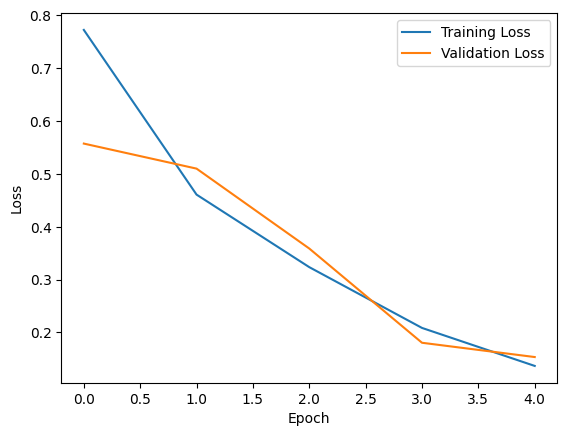

In [21]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(validation_images,validation_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# **PREDICTING MODEL**

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert to RGB (if needed)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Normalize pixel values to be between 0 and 1
    image = image / 255.0

    # Resize the image to match the input shape expected by the model
    image = cv2.resize(image, (100, 100))

    # Expand the dimensions to match the input shape expected by the model
    image = np.expand_dims(image, axis=0)

    return image

def predict_image(model, image):
    # Perform prediction
    predictions = model.predict(image)

    return predictions

def plot_accuracy(predictions, actual_labels):
    predicted_labels = np.argmax(predictions, axis=1)
    actual_labels = np.argmax(actual_labels, axis=1)

    accuracy = np.mean(predicted_labels == actual_labels)

    plt.figure(figsize=(8, 6))
    plt.plot(predicted_labels, label='Predicted Labels')
    plt.plot(actual_labels, label='Actual Labels')
    plt.title(f'Accuracy: {accuracy:.2f}')
    plt.xlabel('Image Index')
    plt.ylabel('Class')
    plt.legend()
    plt.show()

def process_images_in_directory(model, directory):
    images = []
    labels = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(directory, filename)
            image = preprocess_image(image_path)
            images.append(image)

            # Assuming labels are encoded in the filename or directory structure
            # Extract label from filename or directory name and encode it
            # Add your label encoding logic here
            # Example:
            if "cheetah" in filename:
                label = [0, 0]
            elif "hyena" in filename:
                label = [1, 0]
            elif "jaguar" in filename:
                label = [0, 1]
            elif "tiger" in filename:
                label = [1, 1]
            else:
                label = None  # Handle uncertain labels

            if label:
                labels.append(label)

    images = np.concatenate(images, axis=0)
    labels = np.array(labels)

    predictions = predict_image(model, images)

    plot_accuracy(predictions, labels)



4/4 [==============================] - 0s 43ms/step


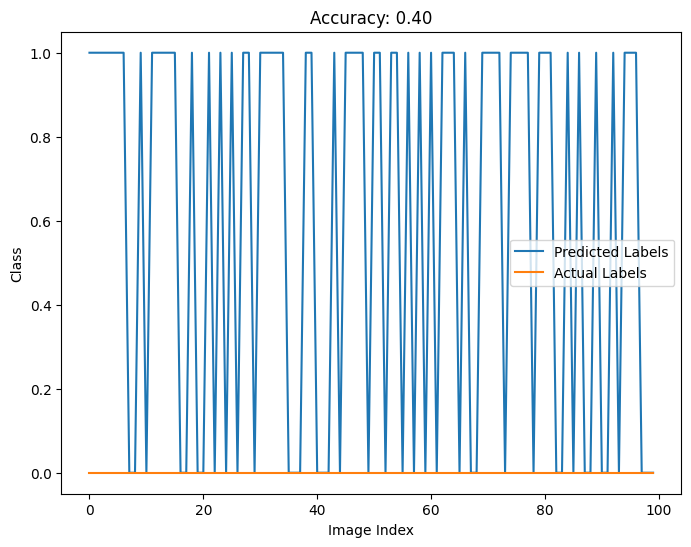

4/4 [==============================] - 0s 46ms/step


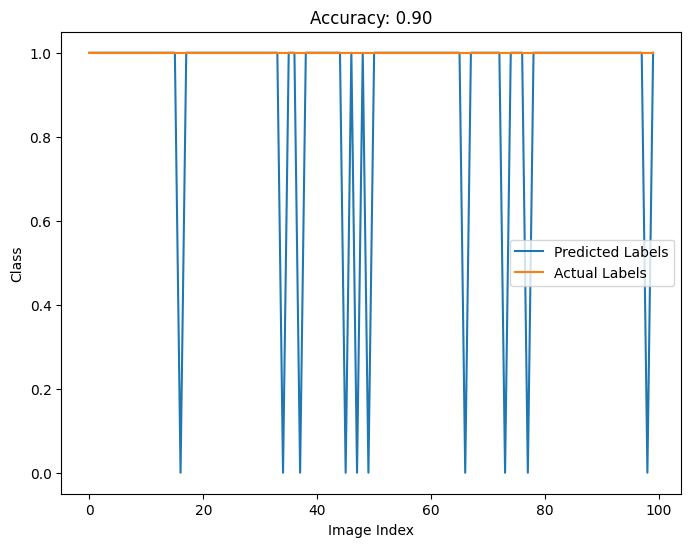

4/4 [==============================] - 0s 77ms/step


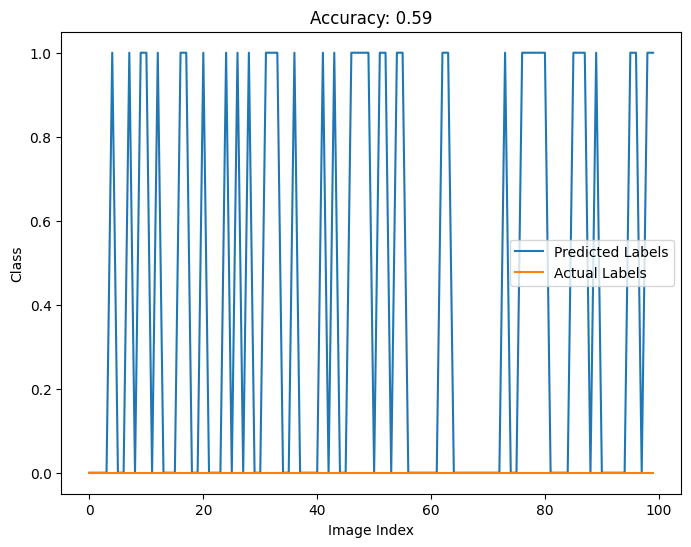

4/4 [==============================] - 0s 76ms/step


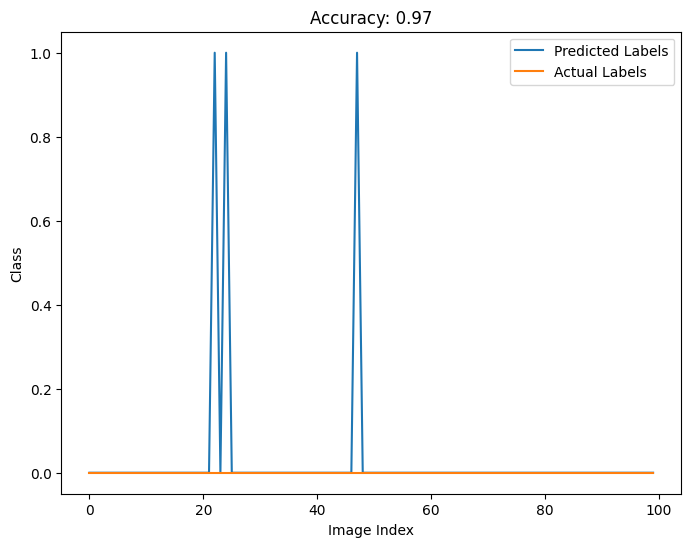

In [ ]:

# Example usage
process_images_in_directory(model, 'drive/MyDrive/Programming Related/data/cheetah_validation_resized')

process_images_in_directory(model, 'drive/MyDrive/Programming Related/data/jaguar_validation_resized')

process_images_in_directory(model, 'drive/MyDrive/Programming Related/data/tiger_validation_resized')

process_images_in_directory(model, 'drive/MyDrive/Programming Related/data/hyena_validation_resized')

Initialize camera

In [ ]:
!pip install imageio

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import numpy as np
import cv2
from PIL import Image, ImageDraw, ImageFont

In [ ]:
from google.colab import files
import cv2
import numpy as np

# Define a function to preprocess the uploaded image
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert to RGB (if needed)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Normalize pixel values to be between 0 and 1
    image = image / 255.0

    # Resize the image to match the input shape expected by the model
    image = cv2.resize(image, (100, 100))

    # Expand the dimensions to match the input shape expected by the model
    image = np.expand_dims(image, axis=0)

    return image

# Upload the image file
uploaded = files.upload()

# Get the filename of the uploaded image
image_path = next(iter(uploaded))

# Preprocess the uploaded image
processed_image = preprocess_image(image_path)

# Make predictions using your model
predictions = model.predict(processed_image)

# Display the prediction results
print("Predictions:", predictions)

x = predictions[0][0]
y = predictions[0][1]

class_labels = {
    (0, 0): "Cheetah",
    (1, 0): "Hyena",
    (0, 1): "Jaguar",
    (1, 1): "Tiger"
}

if x < 0.5:
    if y < 0.5:
        label = class_labels[(0, 0)]
    else:
        label = class_labels[(0, 1)]
else:
    if y < 0.5:
        label = class_labels[(1, 0)]
    else:
        label = class_labels[(1, 1)]

print("Classified as:", label)
# # Define the class labels
# class_labels = {
#     (0, 0): "Cheetah",
#     (1, 0): "Hyena",
#     (0, 1): "Jaguar",
#     (1, 1): "Tiger"
# }

# # Compare predictions with label values and print corresponding class name
# for pred in predictions:
#     print("Current prediction:", pred)
#     for label, class_name in class_labels.items():
#         print("Current label:", label)
#         if np.array_equal(pred, label):
#             print("Predicted class:", class_name)
#             break


Saving tiger_883_resized.jpg to tiger_883_resized (1).jpg
1/1 [==============================] - 0s 36ms/step
Predictions: [[0.99960625 0.8786664 ]]
Classified as: Tiger
